In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [16]:
df = pd.read_csv('../source_data/game_data_all.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             67571 non-null  int64  
 1   game                   67571 non-null  object 
 2   link                   67571 non-null  object 
 3   release                67571 non-null  object 
 4   peak_players           67571 non-null  int64  
 5   positive_reviews       67571 non-null  int64  
 6   negative_reviews       67571 non-null  int64  
 7   total_reviews          67571 non-null  int64  
 8   rating                 67571 non-null  float64
 9   primary_genre          67561 non-null  object 
 10  store_genres           67514 non-null  object 
 11  publisher              67110 non-null  object 
 12  developer              67443 non-null  object 
 13  detected_technologies  60265 non-null  object 
 14  store_asset_mod_time   67275 non-null  object 
 15  re

In [18]:
missing_data_in_columns = df.isna().any() #czy sa nany i gdzie
print(missing_data_in_columns)

Unnamed: 0               False
game                     False
link                     False
release                  False
peak_players             False
positive_reviews         False
negative_reviews         False
total_reviews            False
rating                   False
primary_genre             True
store_genres              True
publisher                 True
developer                 True
detected_technologies     True
store_asset_mod_time      True
review_percentage         True
players_right_now         True
24_hour_peak              True
all_time_peak            False
all_time_peak_date        True
dtype: bool


In [19]:
#właściwy kod na obliczenie wieku gry
df['release'] = pd.to_datetime(df['release'])
df['rok'] = df['release'].dt.year
df['game_age'] = 2024 - df['rok']
df.drop('rok', axis=1)

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),...,Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),...,CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),...,SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),...,Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),...,Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67566,67566,Space Empires V,/app/1690/,2006-10-16,137,290,120,410,67.34,Strategy (2),...,Strategy First,Malfador Machinations,NaN,2019-10-29,70.0,8,12,137,2013-03-01,18
67567,67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,15,173,104,277,60.17,Strategy (2),...,Strategy First,Strategy First,NaN,2019-11-19,62.0,0,2,15,2014-03-01,18
67568,67568,Gumboy: Crazy Adventures,/app/2520/,2006-12-19,22,61,60,121,50.32,Unknown Genre (0),...,CINEMAX s.r.o.,CINEMAX s.r.o.,SDK.OpenAL; SDK.Vorbis,2022-11-04,50.0,0,1,22,2008-09-13,18
67569,67569,Shattered Union,/app/3960/,2006-10-25,13,71,70,141,50.27,Strategy (2),...,2K,PopTop,SDK.Bink_Video; SDK.Miles_Sound_System,2019-09-20,50.0,1,2,13,2020-03-15,18


In [20]:
df['game_age'].unique()

array([ 1,  8,  5, 11,  7,  4,  2,  3,  6,  9, 10, 15, 13, 14, 12, 17, 16,
       18])

In [21]:
df.sort_values('game')

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
15236,15236,A Space Odyssey,/app/1821510/,2022-02-03,1,0,1,1,40.58,Casual (4),...,XIE SIYUAN,NaN,2022-01-19,NaN,0,0,1,2022-02-03,2022,2
61577,61577,Armies of Riddle CLASSIC,/app/527040/,2016-09-30,3,0,2,2,35.92,Indie (23),...,Game Scorpion Inc.,Engine.Unity,2016-09-20,NaN,0,0,3,2016-09-30,2016,8
26555,26555,Build & Battle,/app/604590/,2021-09-02,3,4,9,13,39.46,Strategy (2),...,Funtraum Games,NaN,2021-08-29,30.0,0,0,3,2021-09-02,2021,3
5530,5530,Castle of Full Moon 月圆之堡,/app/1978500/,2022-08-27,4,24,1,25,78.75,Indie (23),...,starknow,Engine.RPGMaker; SDK.NWJS; SDK.NodeJS,2022-08-07,96.0,0,0,4,2022-08-29,2022,2
48861,48861,Chamber of the Sci-Mutant Priestess,/app/768480/,2018-02-08,3,16,10,26,57.26,Action (1),...,ERE Informatique,Emulator.DOSBOX; SDK.SDL,2018-01-20,61.0,0,0,3,2018-06-19,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,6932,～Daydream～蝶が舞う頃に,/app/1966070/,2022-05-26,25,105,23,128,74.61,Simulation (28),...,Kokutou Umeboshi,Engine.Godot,2022-05-09,82.0,2,4,25,2022-05-29,2022,2
51196,51196,🐰RabbiruN🐰,/app/806160/,2018-03-27,3,6,18,24,34.49,Casual (4),...,Paleno Games,Engine.Unity,2018-03-19,25.0,0,0,3,2018-03-28,2018,6
52234,52234,🔴 Circles,/app/460250/,2017-02-17,7,114,14,128,80.02,Indie (23),...,Jeroen Wimmers,Engine.Adobe_AIR; SDK.Adobe_Flash,2022-10-28,89.0,1,3,7,2017-02-01,2017,7
13754,13754,🕌魔塔与6️⃣勇者 (Six Braves),/app/1821570/,2022-09-13,418,245,195,440,54.77,Free to Play (37),...,Zeros,Engine.RPGMaker; SDK.Greenworks; SDK.NWJS; SDK...,2022-09-13,55.0,1,16,418,2022-11-12,2022,2


In [22]:
wyrazy = ['Witcher']
x = df[df['game'].str.contains('|'.join(wyrazy))]
x

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
28297,28297,GWENT: The Witcher Card Game,/app/1284410/,2020-05-19,7504,21542,4818,26360,80.24,Strategy (2),...,CD PROJEKT RED,Engine.Unity; SDK.Qt; SDK.Wwise,2022-06-09,81.0,960,"1,202",7504,2020-05-20,2020,4
43996,43996,Thronebreaker: The Witcher Tales,/app/973760/,2018-11-09,3371,12718,1648,14366,86.37,RPG (3),...,CD PROJEKT RED,Engine.Unity; SDK.Wwise,2022-04-28,88.0,91,123,3371,2018-11-11,2018,6
61707,61707,The Witcher 3: Wild Hunt,/app/292030/,2015-05-18,103329,685661,28911,714572,95.16,RPG (3),...,CD PROJEKT RED,Engine.REDengine; SDK.CRIWARE; SDK.Intel_XeSS;...,2023-01-31,95.0,"10,412","18,146",103329,2020-01-05,2015,9
64920,64920,The Witcher Adventure Game,/app/303800/,2014-11-27,294,976,302,1278,73.31,Strategy (2),...,CD PROJEKT RED,Engine.Unity,2019-02-04,76.0,2,6,294,2015-05-10,2014,10
66280,66280,The Witcher 2: Assassins of Kings Enhanced Edi...,/app/20920/,2012-04-17,12884,70504,8257,78761,88.19,RPG (3),...,CD PROJEKT RED,Engine.REDengine; SDK.CRIWARE; SDK.FMOD,2021-05-25,89.0,263,"1,034",12884,2015-05-17,2012,12
67253,67253,The Witcher: Enhanced Edition,/app/20900/,2008-09-16,12685,64428,8271,72699,87.29,RPG (3),...,CD PROJEKT RED,Engine.Aurora; Engine.Unity; SDK.Bink_Video; S...,2021-05-25,88.0,348,"1,169",12685,2020-01-01,2008,16


In [35]:
wyrazy = ['Katana ZERO']
x = df[df['game'].str.contains('|'.join(wyrazy))]
x

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
36269,36269,Katana ZERO,/app/460950/,2019-04-18,1575,54842,1024,55866,96.37,Indie (23),...,Askiisoft,Engine.GameMaker,2022-10-28,98.0,202,208,1575,2019-04-21,2019,5


In [7]:
df['primary_genre'].unique()

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Free to Play (37)',
       'Simulation (28)', 'Early Access (70)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Unknown Genre (0)',
       'Violent (73)', 'Design & Illustration (53)', nan, 'Gore (74)',
       'Sexual Content (71)', 'Education (54)', 'Nudity (72)',
       'Game Development (60)', 'Utilities (57)', 'Audio Production (52)',
       'Video Production (58)', 'Web Publishing (59)',
       'Unknown Genre (34)', 'Unknown Genre (33)', 'Unknown Genre (6)',
       'Unknown Genre (21)'], dtype=object)

In [8]:
category_to_drop = ['Unknown Genre (0)', 'Game Development (60)', 'Utilities (57)', 'Audio Production (52)', 'Video Production (58)', 'Web Publishing (59)', 'Free to Play (37)',
                    'Unknown Genre (34)', 'Unknown Genre (33)', 'Unknown Genre (6)', 'Unknown Genre (21)', 'Design & Illustration (53)', 'Massively Multiplayer (29)']
rows_to_drop = df[df['primary_genre'].isin(category_to_drop)].index
df.drop(rows_to_drop, inplace=True)

In [9]:
category = df['primary_genre'].unique()
category

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Simulation (28)',
       'Early Access (70)', 'Racing (9)', 'Sports (18)', 'Violent (73)',
       nan, 'Gore (74)', 'Sexual Content (71)', 'Education (54)',
       'Nudity (72)'], dtype=object)

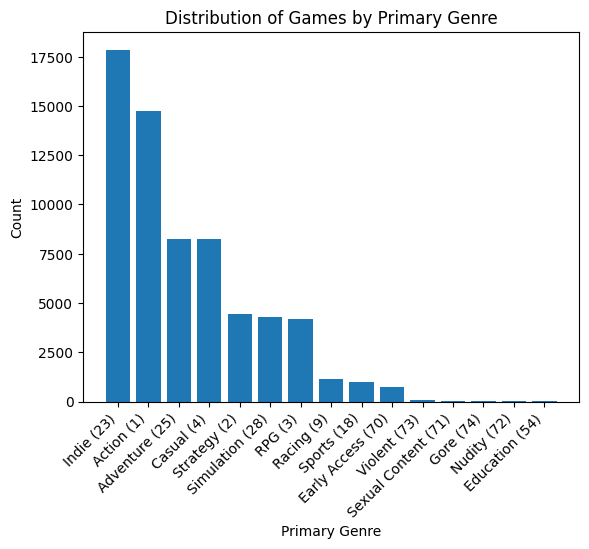

In [10]:
genre_counts = df['primary_genre'].value_counts()
plt.bar(genre_counts.index, genre_counts)
plt.xlabel("Primary Genre")
plt.ylabel("Count")
plt.title('Distribution of Games by Primary Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
#Usunięcie niepotrzebnych kolumn
columns_to_drop = ['peak_players', 'detected_technologies']
df.drop(columns=columns_to_drop)

,Unnamed: 0,game,link,release,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,2023,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,2023,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,2023-03-24,98.0,618,776,15543,2023-03-31,2023,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,2023-03-22,98.0,101,101,1415,2023-03-28,2023,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,2023-04-11,97.0,630,664,6132,2023-01-29,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67564,67564,Earth 2160,/app/1900/,2006-04-01,878,375,1253,67.73,Strategy (2),Strategy (2),Topware Interactive,Reality Pump Studios,2019-12-23,70.0,13,17,9960,2018-04-12,2006,18
67565,67565,RoboBlitz,/app/4300/,2006-11-07,57,20,77,67.55,Action (1),"Action (1), Indie (23)",Naked Sky Entertainment,Naked Sky Entertainment,NaN,75.0,0,1,7,2014-04-27,2006,18
67566,67566,Space Empires V,/app/1690/,2006-10-16,290,120,410,67.34,Strategy (2),Strategy (2),Strategy First,Malfador Machinations,2019-10-29,70.0,8,12,137,2013-03-01,2006,18
67567,67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,173,104,277,60.17,Strategy (2),Strategy (2),Strategy First,Strategy First,2019-11-19,62.0,0,2,15,2014-03-01,2006,18


In [12]:
publisher_rating = df[['publisher', 'rating']]
publisher_rating = publisher_rating[publisher_rating['rating'] > 95.]
publisher_rating.groupby('publisher')[['rating']].mean().sort_values('rating', ascending=False)

lista = publisher_rating['publisher'].to_numpy()

In [13]:
df[df['publisher'].isin(lista)]

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),...,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,2023,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),...,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,2023,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),...,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31,2023,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),...,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28,2023,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),...,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67535,67535,Rocket Mania! Deluxe,/app/3440/,2006-08-30,17,67,3,70,83.04,Casual (4),...,PopCap Games Inc.,SDK.BASS,NaN,95.0,1,6,17,2018-03-22,2006,18
67537,67537,Bejeweled Deluxe,/app/3350/,2006-08-30,20,156,17,173,81.67,Casual (4),...,PopCap Games Inc.,SDK.BASS,2021-08-03,90.0,2,7,20,2009-01-24,2006,18
67538,67538,Zen of Sudoku,/app/4900/,2006-12-14,24,230,31,261,80.99,Casual (4),...,Unknown Worlds Entertainment,SDK.BASS; SDK.cURL,NaN,88.0,5,16,24,2018-12-01,2006,18
67546,67546,Hammer Heads Deluxe,/app/3400/,2006-08-30,10,50,6,56,77.65,Casual (4),...,PopCap Games Inc.,SDK.BASS,NaN,89.0,0,2,10,2019-01-01,2006,18


In [14]:
#Grupowanie po wieku gry i obliczanie średniej liczby recenzji w grupie.
srednia_wg_wieku = df.groupby('game_age')[['total_reviews']].mean().reset_index()
srednia_wg_wieku

,game_age,total_reviews
0,1,344.466440
1,2,531.174876
2,3,683.410196
3,4,1123.692636
4,5,1028.414607
5,6,1135.303393
6,7,1091.884661
7,8,1954.238015
8,9,3611.483294
9,10,2501.521100


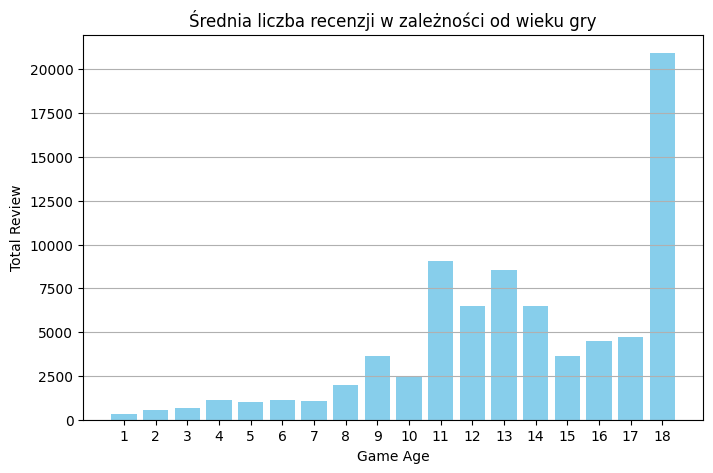

In [15]:
plt.figure(figsize=(8, 5))
plt.bar(srednia_wg_wieku['game_age'], srednia_wg_wieku['total_reviews'], color='skyblue')
plt.xlabel('Game Age')
plt.ylabel('Total Review')
plt.title('Średnia liczba recenzji w zależności od wieku gry')
plt.xticks(srednia_wg_wieku['game_age'])
plt.grid(axis='y')
plt.show()

In [16]:
#Grupowanie po rodzaju gry i obliczanie średniej liczby recenzji w grupie.
srednia_wg_rodzaju = df.groupby('primary_genre')[['total_reviews']].mean().reset_index()
srednia_ocena_wg_rodzaju = df.groupby('primary_genre')[['rating']].mean().reset_index()

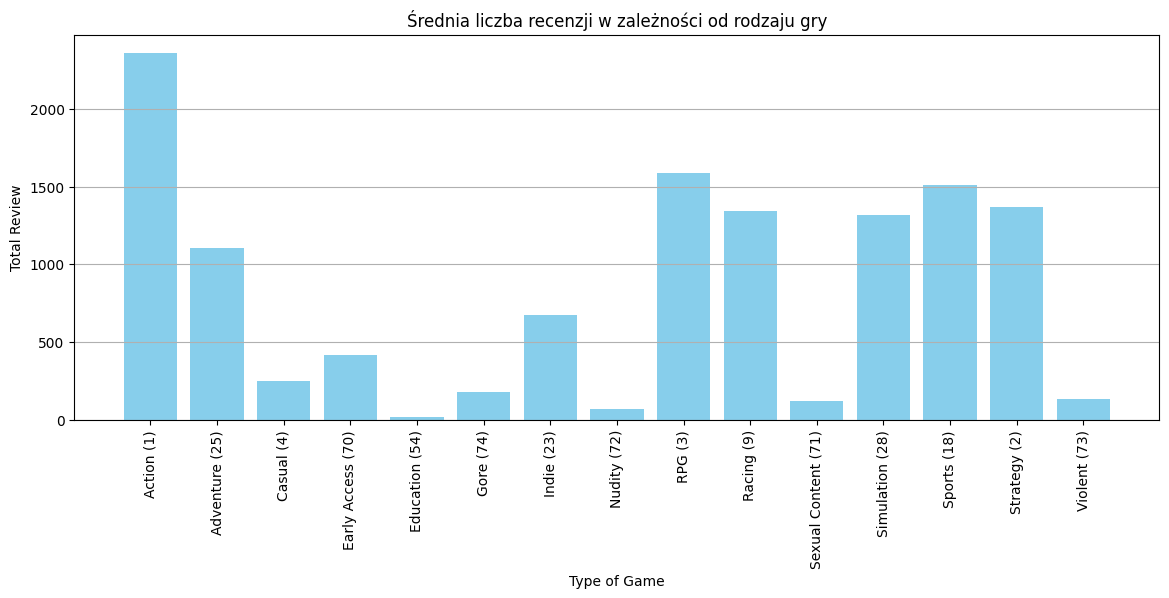

In [17]:
plt.figure(figsize=(14, 5))
plt.bar(srednia_wg_rodzaju['primary_genre'], srednia_wg_rodzaju['total_reviews'], color='skyblue')
plt.xlabel('Type of Game')
plt.ylabel('Total Review')
plt.title('Średnia liczba recenzji w zależności od rodzaju gry')
plt.xticks(srednia_wg_rodzaju['primary_genre'], rotation='vertical')
plt.grid(axis='y')
plt.show()

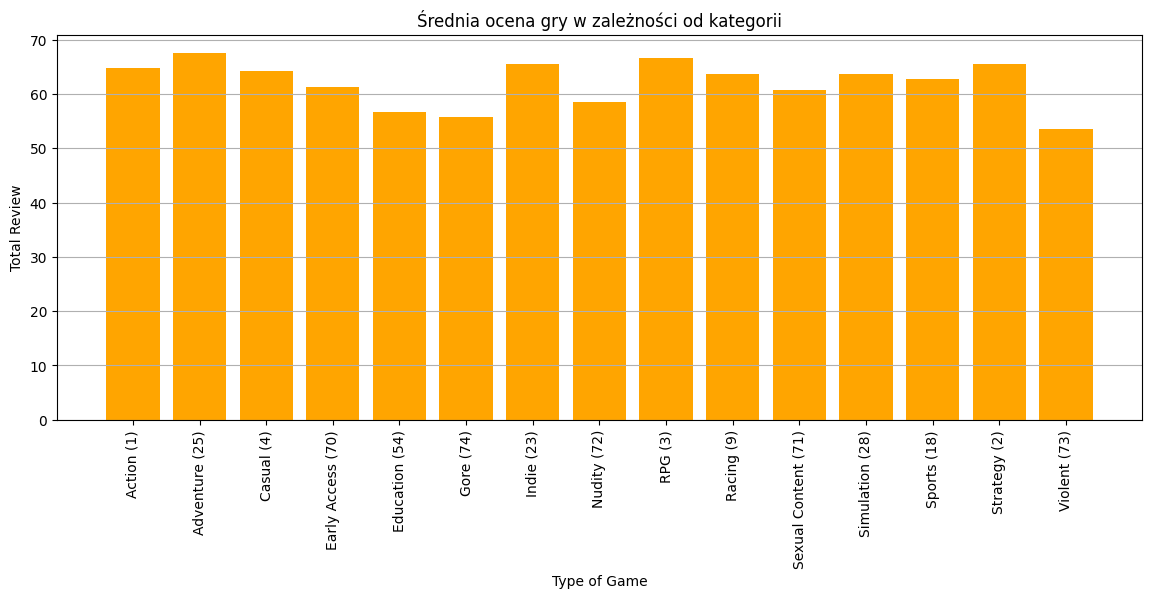

In [18]:
plt.figure(figsize=(14, 5))
plt.bar(srednia_ocena_wg_rodzaju['primary_genre'], srednia_ocena_wg_rodzaju['rating'], color='orange')
plt.xlabel('Type of Game')
plt.ylabel('Total Review')
plt.title('Średnia ocena gry w zależności od kategorii')
plt.xticks(srednia_ocena_wg_rodzaju['primary_genre'], rotation='vertical')
plt.grid(axis='y')
plt.show()

In [19]:
srednia_ocena_wg_rodzaju.sort_values('rating',ascending=False)

,primary_genre,rating
1,Adventure (25),67.561084
8,RPG (3),66.577058
6,Indie (23),65.594101
13,Strategy (2),65.551706
0,Action (1),64.874466
2,Casual (4),64.269843
9,Racing (9),63.674335
11,Simulation (28),63.615956
12,Sports (18),62.769694
3,Early Access (70),61.346574


In [20]:
#Posortowanie bazy2 wg wieku gry i w tych grupach wg rodzaju. Obliczenie średniej total_reviews i uszeregowanie rodzajów od największej średniej.
posortowana_baza2 = df[df['total_reviews'] >10000].sort_values(by=['game_age', 'primary_genre'])
średnia_baza2 = posortowana_baza2.groupby(['game_age', 'primary_genre'])['total_reviews'].mean().reset_index()
posortowana_średnia = średnia_baza2.sort_values(by=['game_age', 'total_reviews'], ascending=[True, False])
posortowana_średnia

,game_age,primary_genre,total_reviews
1,1,Adventure (25),64783.500000
0,1,Action (1),44748.166667
3,1,Indie (23),25372.666667
4,1,RPG (3),20477.000000
6,1,Strategy (2),15084.000000
...,...,...,...
123,17,Strategy (2),14899.000000
125,18,Indie (23),945444.000000
127,18,Strategy (2),27515.000000
124,18,Action (1),19998.000000


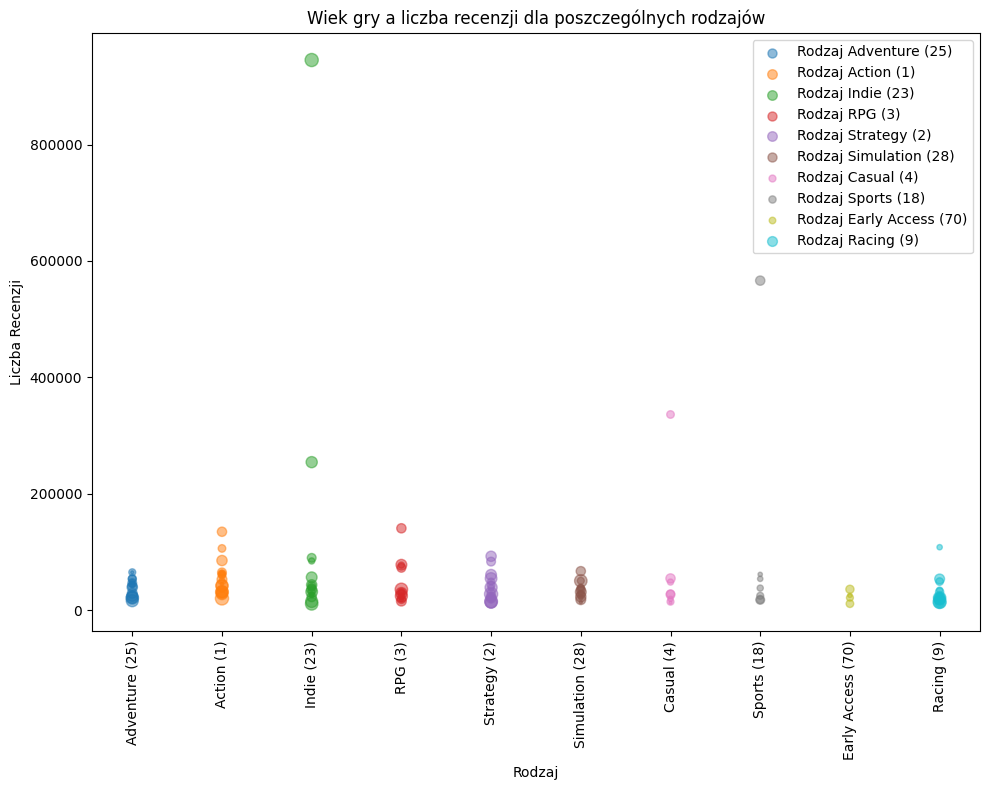

In [21]:
# W wykresie wielkość kropek jest proporcjonalne do wieku gry.
plt.figure(figsize=(10,8))
for rodzaj in posortowana_średnia['primary_genre'].unique():
    data = posortowana_średnia[posortowana_średnia['primary_genre'] == rodzaj]
    plt.scatter(data['primary_genre'], data['total_reviews'], s=data['game_age']*5, label=f'Rodzaj {rodzaj}', alpha=0.5)
plt.xlabel('Rodzaj')
plt.ylabel('Liczba Recenzji')
plt.title('Wiek gry a liczba recenzji dla poszczególnych rodzajów')
plt.xticks(rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

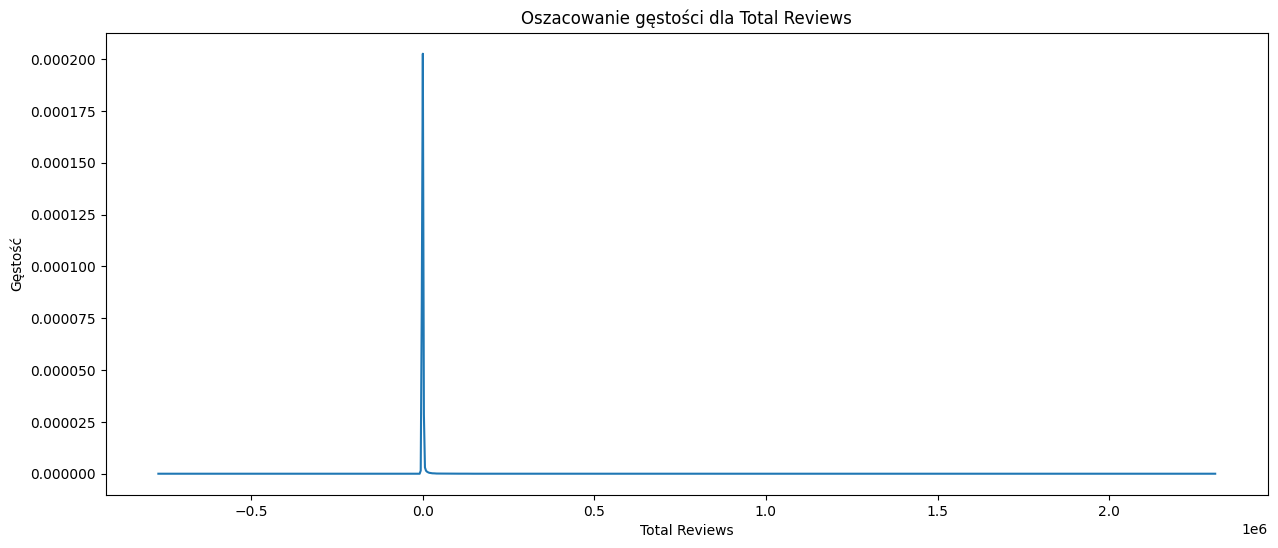

In [22]:
#Kernel Density Estimate
plt.figure(figsize=(15,6))
df['total_reviews'].plot(kind='kde')
plt.xlabel('Total Reviews')
plt.ylabel('Gęstość')
plt.title('Oszacowanie gęstości dla Total Reviews')
plt.show()

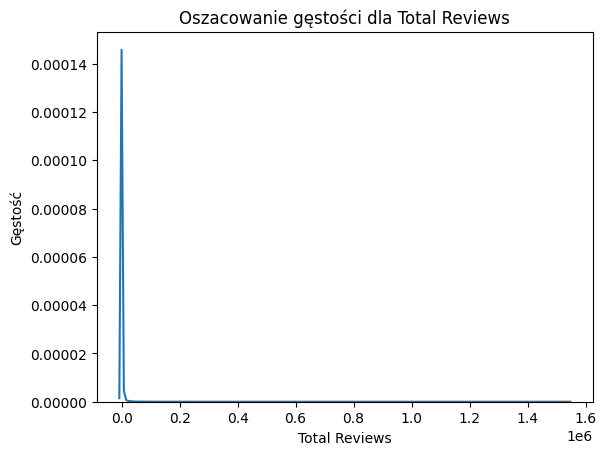

In [23]:
sns.kdeplot(df['total_reviews'], bw_adjust=1.5)
plt.xlabel('Total Reviews')
plt.ylabel('Gęstość')
plt.title('Oszacowanie gęstości dla Total Reviews')
plt.show()

In [24]:
# #Statystyki opisowe dla total_reviews.
# df['total_reviews'].describe()

In [25]:
# column_indexes = df.columns #inny sposob na sprawdzenie indeksow
# print(column_indexes)

In [26]:
# column_position = df.columns.get_loc('Unnamed: 0') #przykładowo sprawdzamy pozycję danej kolumny
# column_position

In [27]:
# #Do wykorzystania po ustaleniu, które kolumny usuwamy


# pd.read_csv('sample.csv', skiprows=[0,2]) #-> pominiecie wierszy
# pd.read_csv('sample.csv', usecols=[0,1]) #-> wskazanie, ktore kolumny chcemy uzyc
# df = pd.read_csv('sample.csv', usecols=lambda column: column not in [1]) #wariacja do pomijania kolumn
# pd.read_csv('sample.csv', nrows=3) #-> ile wierszy chcemy wczytać, jesli plik jest duży
# pd.DataFrame.value_counts() - konkretne wartosci dyskretne

# columns_to_drop = ['B', 'D'] #usuwanie kolumn v.1
# df = df.drop(columns=columns_to_drop)

# column_to_skip = 'column' #usuwanie kolumn v.2
# df = df.drop(columns=[column_to_skip])